### Критерии Стьюдента

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *

### Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [5]:
# Считываем данные
data = pd.read_csv('ADHD.txt', sep = ' ')
data.columns = ['Placebo', 'Methylphenidate']
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


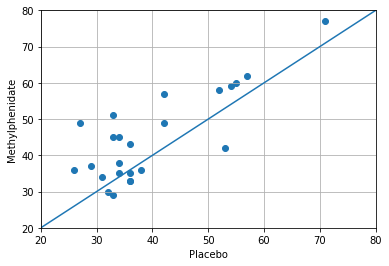

In [13]:
# Посмотрим на взаимосвязь признаков
plt.scatter(data['Placebo'], data['Methylphenidate'])
plt.grid()
plt.xlim((20, 80))
plt.ylim((20, 80))
plt.xlabel('Placebo')
plt.ylabel('Methylphenidate')
plt.plot(range(100));

Основная масса точек находится выше прямой, значит препарат действительно помогает, но это нужно оценить строго.

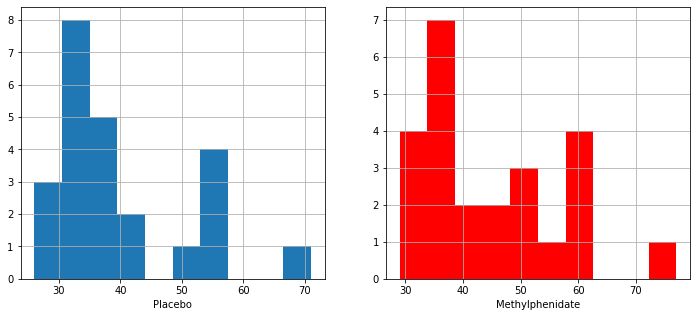

In [23]:
# Взглянем на гистограммы признаков
fig, axes = plt.subplots(1,2, figsize = (12, 5))
axes[0].hist(data['Placebo'])
axes[0].grid()
axes[0].set_xlabel('Placebo')
axes[1].hist(data['Methylphenidate'], color = 'r')
axes[1].set_xlabel('Methylphenidate')
axes[1].grid()

### Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале ```[0, 100]```, можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [24]:
# Одновыборочный критерий Стьюдента
stats.ttest_1samp(data['Placebo'], 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

Критерий говорит, что среднее не равно 50

In [25]:
# Оценим интервально среднее для выборки
print('Confidence Interval: ', zconfint(data['Placebo']))

Confidence Interval:  (35.223272709859756, 44.276727290140244)


Интервал не включает 50 что еще раз подтверждает наши предположения выше.

Среднее значение способности к подавлению изменяется от 35.2 до 44.3 пунктов.

Теперь оценим влияние самого препарата. Действительно ли он помогает?

### Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, **убедимся, что распределения в выборках существенно не отличаются от нормальных.** С этой целью, построим графики Q-Q plot для группы Placebo и перпарата.

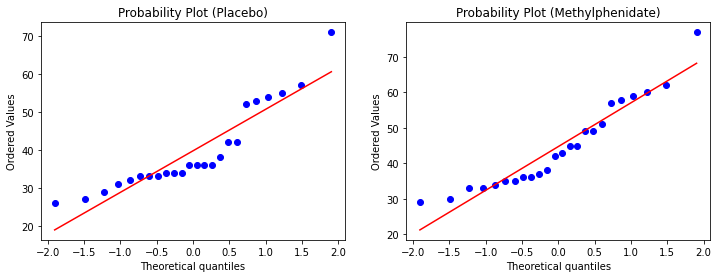

In [30]:
# Строим графики Q-Q plot для нашиз признаков 
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
stats.probplot(data['Placebo'], dist = 'norm', plot = plt)
plt.title('Probability Plot (Placebo)')

plt.subplot(1, 2, 2)
stats.probplot(data['Methylphenidate'], dist = 'norm', plot = plt)
plt.title('Probability Plot (Methylphenidate)');

Видим, что и в том и в другом случае наши точки не сильно отличаются от прямой, они лежат не очень далеко. Это дает нам основание предполагать, что данные распределены с некоторым распределением, которое сильно от нормального не отличается. Однако для того чтобы проверить это более строго, давайте воспользуемся критерием Шапиро-Уилка.

**Критерий Шапиро-Уилка:**

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально

In [34]:
# Проверяем распределение признаков на нормальность строго
print('Shapiro Normality Test (Placebo): ', stats.shapiro(data['Placebo']))
print('Shapiro Normality Test (Methylphenidate): ', stats.shapiro(data['Methylphenidate']))

Shapiro Normality Test (Placebo):  ShapiroResult(statistic=0.8574873208999634, pvalue=0.00302018690854311)
Shapiro Normality Test (Methylphenidate):  ShapiroResult(statistic=0.9164453148841858, pvalue=0.04876822605729103)


Получается, что данные все-таки не распределены нормально. Однако если мы вернемся к предыдущем рисункам, мы видим, что да, действительно, распределение от нормального отличается, но не очень сильно. А мы знаем, что критерий Стьюдента работает в условиях, когда **распределение не является нормальным, но существенно от него не отличается.** Значит, давайте все-таки попробуем применить критерий Стьюдента.

**Критерий Стьюдента:**

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [35]:
# equal_var = False (т.к. у нас нет информации о том, что дисперсии одинаковы)
stats.ttest_ind(data['Placebo'], data['Methylphenidate'], equal_var = False) # ind stands for independent (samples)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

Нулевую гипотезу отвергнуть не можем, оценим интервально разность по этим 2м выборкам

In [37]:
means_diff = CompareMeans(DescrStatsW(data['Methylphenidate']), DescrStatsW(data['Placebo']))
print('Confidence Interval: ', means_diff.tconfint_diff(alpha = 0.05))

Confidence Interval:  (-1.914589250238282, 11.831255916904954)


Доверительный интервал получился следующим: от −2 до 12. То есть фактически наше среднее все-таки скорее больше, чем 0, однако 0 лежит в этом интервале. Получается, что однозначно сказать довольно сложно.

На самом деле выборки ```связанные```, используем:

### Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение **попарных разностей существенно не отличается от нормального.** Для этого используем Q-Q plot.

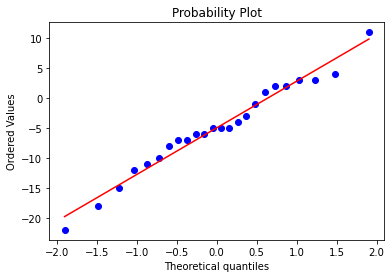

In [39]:
stats.probplot(data['Placebo'] - data['Methylphenidate'], dist = 'norm', plot = plt);

Распределение скорее всего похоже на нормальное. Оценим строго:

**Критерий Шапиро-Уилка:**

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [40]:
print('Shapiro Normality Test: ', stats.shapiro(data['Placebo'] - data['Methylphenidate']))

Shapiro Normality Test:  ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)


Действительно, **попарные разности распределены нормально**

**Критерий Стьюдента:**

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [41]:
stats.ttest_rel(data['Methylphenidate'], data['Placebo']) # rel stands for relative

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

Обнаружены статистически значимые различия, препарат влияет.

In [44]:
# Оценим ДИ для разностей
print('Confidence Interval: ', DescrStatsW(data['Methylphenidate'] - data['Placebo']).tconfint_mean())

Confidence Interval:  (1.7752357893192365, 8.14143087734743)


Видим, что разность в среднем изменяется от 2 до 8 и правее 0

### Задания из теста

**1)** Имеются данные о стоимости и размерах 53940 бриллиантов.

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции ```sklearn.cross_validation.train_test_split``` 

Зафиксируйте ```random state = 1```. На обучающей выборке настройте две регрессионные модели:
- Линейную регрессию с помощью LinearRegression без параметров
- Случайный лес из 10 деревьев с помощью RandomForestRegressor с ```random_state=1```

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. 

Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости ```α=0.05```?

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Считываем данные
data = pd.read_csv('diamonds.txt', sep = '\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [70]:
# Отбираем признаки и таргет
features = data.columns[data.columns != 'price']
x = data[features]
y = data['price']

# Осуществляем разбиение 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 1)

In [80]:
# Обучаем линейную регрессию без параметров
regression_model = LinearRegression(n_jobs= -1)

regression_model.fit(x_train, y_train)
regression_preds = regression_model.predict(x_test)

print('Linear Regression MAE: ', mean_absolute_error(y_test, regression_preds))

Linear Regression MAE:  890.3764004285584


In [82]:
# Обучаем случайный лес
rm_forest_model = RandomForestRegressor(n_jobs = -1, random_state = 1)

rm_forest_model.fit(x_train, y_train)
rm_forest_preds = rm_forest_model.predict(x_test)

print('Random Forest MAE: ', mean_absolute_error(y_test, regression_preds))

Random Forest MAE:  779.7117583558185


Можем заметить что ```Random Forest``` лучше, но действительно ли это так? Cформулирем ряд гипотез:

$H_0\colon$ среднее качества предсказаний одинаково (модели не отличаются)

$H_1\colon$ не одинаковы (модели существенно отличаются друг от друга)

Для проверки данных гипотез, воспользуемся Двухвыборочным критерием Стьюдента (зависмые выборки), предварительно проверив распределение попарных разностей между предсказаниями и истинными ответами.

In [141]:
# Ошибки предсказаний для моделей (без модулей)
reg_diff = regression_preds - y_test
rf_forest_diff = rm_forest_preds - y_test

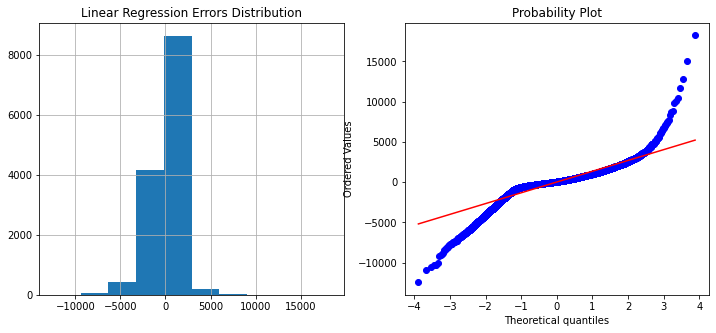

In [142]:
# Взглянем на распределение ошибок и график Q - Q plot (Линейная Регрессия)
fig, axes = plt.subplots(1,2, figsize = (12, 5))
axes[0].hist(reg_diff)
axes[0].set_title('Linear Regression Errors Distribution')
axes[0].grid()
axes[1] = stats.probplot(reg_diff, dist = 'norm', plot = plt)

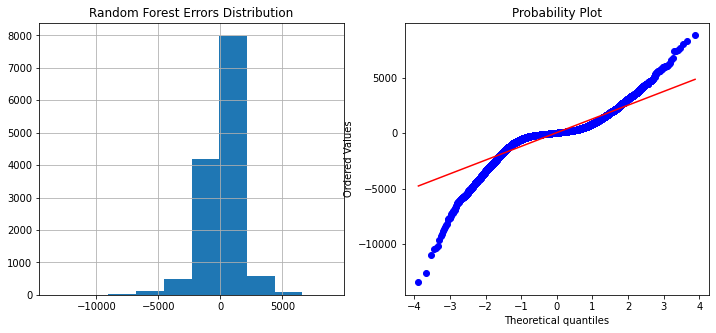

In [143]:
# Взглянем на распределение ошибок и график Q - Q plot (Случайный Лес)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].hist(rf_forest_diff)
axes[0].set_title('Random Forest Errors Distribution')
axes[0].grid()
axes[1] = stats.probplot(rf_forest_diff, dist = 'norm', plot = plt)

Видно, что распределения может быть и не совсем нормальные, но не сильно отличаются от нормального. Взглянем на статистику Шапиро - Уилка.

In [140]:
print('Shapiro Normality Test (Linear Regression): ', stats.shapiro(reg_diff))
print('Shapiro Normality Test (Random Forest): ', stats.shapiro(reg_diff))

Shapiro Normality Test (Linear Regression):  ShapiroResult(statistic=0.6747618913650513, pvalue=0.0)
Shapiro Normality Test (Random Forest):  ShapiroResult(statistic=0.6747618913650513, pvalue=0.0)


c:\users\vlad\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Шапиро Уилка отрицает нормальность распределения ошибок для 2-х моделей

In [148]:
# Двухвыборочным критерием Стьюдента (зависмые выборки)
# Здесь возьмем уже модули
stats.ttest_rel(np.abs(reg_diff), np.abs(rf_forest_diff)) 

Ttest_relResult(statistic=18.03725974451083, pvalue=6.936823477600879e-72)

Видим, что критерий свидетельствует о значимых различиях между моделями.

Модель ```Random Forest``` значимо лучше

**2)** В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [149]:
# Оценим ДИ для разностей средних абсолютных ошибок предсказаний регрессии и случайного леса
print('Confidence Interval: ', DescrStatsW(np.abs(reg_diff) - np.abs(rf_forest_diff)).tconfint_mean())

Confidence Interval:  (98.63852573905199, 122.69075840642812)


**3)** Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 ```мг/дл```. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 ```мг/дл```. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [151]:
# Опишем ГС
population_mean = 9.5
sigma = 0.4

# Опишем выборку
n = 160 
sample_mean = 9.57

Т.к. значение sigma для ГС известно, то воспользуемся одновыборочным критерием Стьюдента (Z - критерием)


In [150]:
# Введем ряд функций
def calculate_z_statistics(sample_mean, population_mean, sigma, n_samples):
    se = sigma/np.sqrt(n_samples) # se - standard error 
    z_statistics = (sample_mean - population_mean)/se
    return z_statistics

# Т.к. нас интересуют просто отличия, то используем двустороннюю альтернативу
def calculate_p_value(z_stat):
    return 2 * (1 - stats.norm.cdf(z_stat))

In [152]:
z_score = calculate_z_statistics(sample_mean = sample_mean,
                               population_mean = population_mean,
                               sigma = sigma,
                               n_samples = n)

p_value = calculate_p_value(z_score)
print(f'Z-Score: {z_score}, p_value: {p_value}')

Z-Score: 2.213594362117875, p_value: 0.026856695507523787
